In [2]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


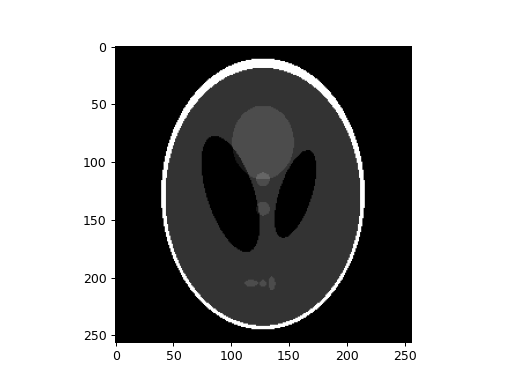

<IPython.core.display.Javascript object>


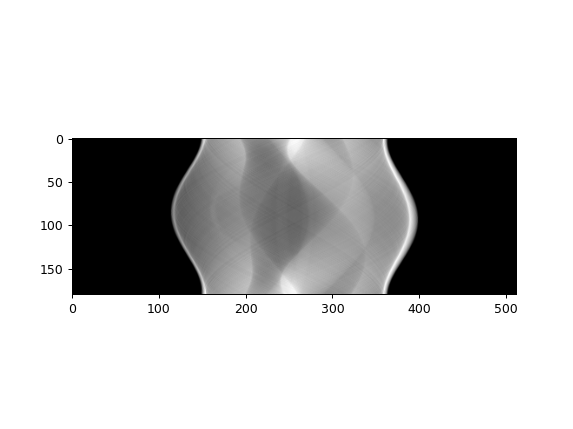

In [66]:
import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)

ratio = 256/160

proj_geom = astra.create_proj_geom('fanflat', ratio*0.784, 512, np.linspace(0,np.pi,180,False),ratio*1000,ratio*520)

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip_fanflat', proj_geom, vol_geom)

# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('/home/xcite/astra-toolbox/samples/python/phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)

plt.gray()
plt.figure()
plt.imshow(P)
plt.figure()
plt.imshow(sinogram)

<IPython.core.display.Javascript object>


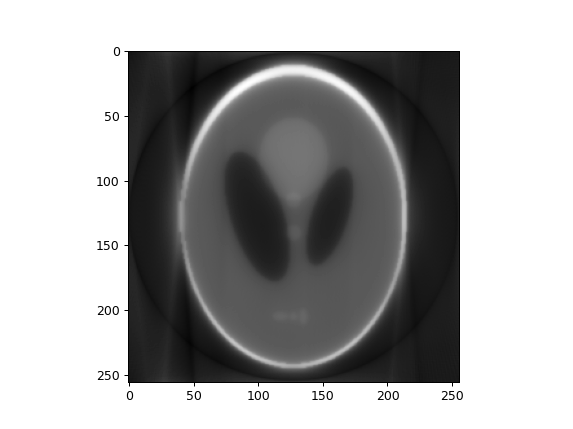

In [26]:
# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure()
pylab.imshow(rec)
pylab.show()

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

In [27]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('Geometry Viewer')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        
        ss = rows*8/512

        self.im = ax.imshow(self.X[:, :, self.ind],cmap='bone',aspect='equal',extent=[-ss,ss,-ss,ss])
        self.update()

    def onscroll(self, event):
        #print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
#         self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [ ]:
fig = plt.figure(figsize=[8,4],dpi=300)

ax1 = fig.add_subplot(131)

tracker1 = IndexTracker(ax1, topas[pad:-pad,pad:-pad,:])#transpose([0,2,1]))


fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)

In [35]:
P

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
import tigre

sys.path.insert(0,'../xpecgen')

import xpecgen as xg

In [60]:
# phantom = xg.Catphan_515()

angles = np.linspace(pi/2,3/2*pi,180,False)

phan = np.tile(P,[10,1,1]).astype(np.float32)

phantom.geomet.nVoxel = np.array(phan.shape)
phantom.geomet.DSD = 1520
phantom.geomet.dVoxel = phantom.geomet.sVoxel/phantom.geomet.nVoxel 
phantom.geomet.dDetector = np.array([0.784, 0.784])
phantom.geomet.sDetector = phantom.geomet.dDetector * phantom.geomet.nDetector  
phantom.geomet.accuracy = 0.5

projs = tigre.Ax(np.tile(P,[10,1,1]).astype(np.float32),phantom.geomet,angles)

<IPython.core.display.Javascript object>


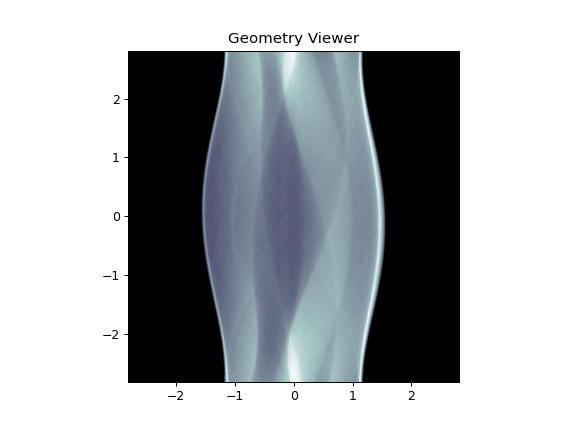

9

In [111]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

tracker1 = IndexTracker(ax1, projs.transpose([0,2,1]))


fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)

<IPython.core.display.Javascript object>


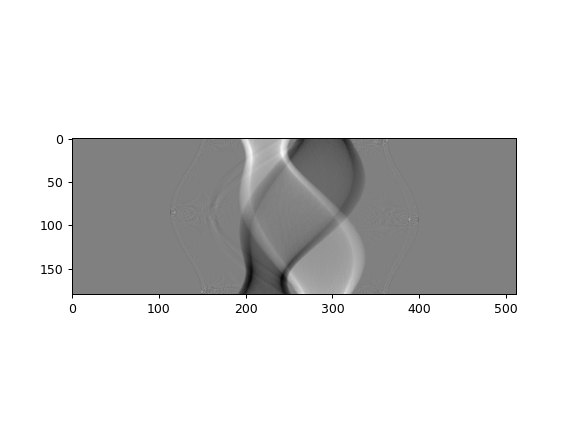

In [112]:
plt.figure();plt.imshow(1.601*projs.transpose([0,2,1])[:,:,10] - sinogram)

<IPython.core.display.Javascript object>


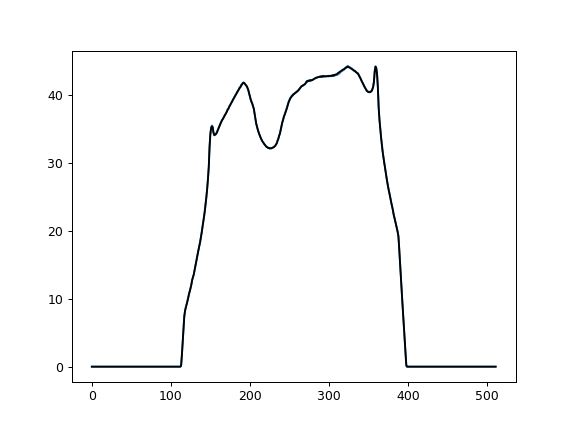

In [86]:
plt.figure()
plt.plot(1.601*np.mean(projs.transpose([0,2,1])[:,:,10],0))
plt.plot(np.mean(sinogram,0),'k')

<IPython.core.display.Javascript object>


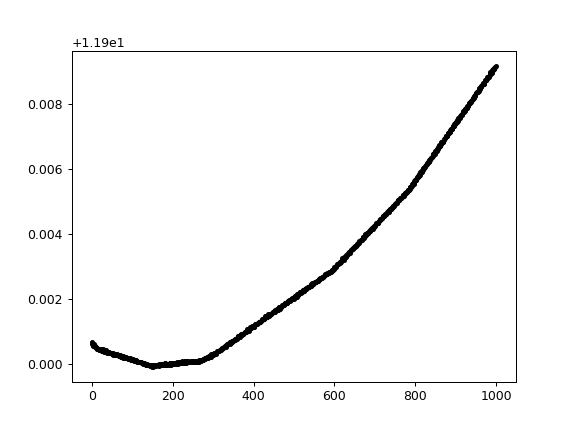

In [105]:
figure()

for ii in range(1000):
    plt.plot(ii,np.sum(np.abs((1.6008 + ii/10000000)*np.mean(projs.transpose([0,2,1])[:,:,10],0) - np.mean(sinogram,0))),'k.')

In [ ]:
import astra
import numpy as np

vol_geom = astra.create_vol_geom(256, 256)

ratio = 256/160

proj_geom = astra.create_proj_geom('fanflat', ratio*0.784, 512, np.linspace(0,np.pi,180,False),ratio*1000,ratio*520)

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip_fanflat', proj_geom, vol_geom)

# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('/home/xcite/astra-toolbox/samples/python/phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)

plt.gray()
plt.figure()
plt.imshow(P)
plt.figure()
plt.imshow(sinogram)

In [ ]:
phantom.geomet.nVoxel = np.array(phan.shape)
phantom.geomet.DSD = 1520
phantom.geomet.dVoxel = phantom.geomet.sVoxel/phantom.geomet.nVoxel 
phantom.geomet.dDetector = np.array([0.784, 0.784])
phantom.geomet.sDetector = phantom.geomet.dDetector * phantom.geomet.nDetector  
phantom.geomet.accuracy = 0.5

In [ ]:
def tigre2astra(phantom,geomet,angles):
    
    tigre_shape = geomet.nVoxel
    
    # Create a geometry object
    vol_geom = astra.create_vol_geom(tigre_shape[1],tigre_shape[2])
    # Create the ratio of 1mm to 1 voxel
    ratio = tigre_shape[1]/geomet.sVoxel[0]
    # create the projection
    proj_geom = astra.create_proj_geom('fanflat', ratio*geomet.dDetector[0],
                                       geomet.nDetector[1], angles + np.pi/2,
                                       ratio*geomet.DSO,ratio*(geomet.DSD-geomet.DSO)
    # For CPU-based algorithms, a "projector" object specifies the projection
    # model used. In this case, we use the "strip" model.
    proj_id = astra.create_projector('strip_fanflat', proj_geom, vol_geom)
                                       
    sinogram = astra.create_sino(phantom, proj_id)*1.601 # this is some sort of relation

In [106]:
phantom.geomet.nVoxel

array([ 10, 256, 256])

In [108]:
phantom.geomet.sVoxel

array([160, 160, 160])

In [109]:
phantom.geomet.nDetector

array([ 64, 512])

In [110]:
print(phantom.geomet)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1520 mm
Distance from source to origin (DSO)= 1000 mm
-----
Detector parameters
Number of pixels (nDetector) = [ 64 512]
Size of each pixel (dDetector) = [0.784 0.784] mm
Total size of the detector (sDetector) = [ 50.176 401.408] mm
-----
Image parameters
Number of voxels (nVoxel) = [ 10 256 256]
Total size of the image (sVoxel) = [160 160 160] mm
Size of each voxel (dVoxel) = [16.     0.625  0.625] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad
